In [49]:
import pandas as pd
import numpy as np

In [50]:
df = pd.read_csv("csgo_players.csv")
df.head()

,player_id,nickname,real_name,age,country,current_team,teams,total_kills,total_deaths,headshot_percentage,...,3_kill_rounds,4_kill_rounds,5_kill_rounds,rifle_kills,sniper_kills,smg_kills,pistol_kills,grenade_kills,other_kills,rating
0,11893,ZywOo,Mathieu Herbaut,21,France,Vitality,"Vitality, aAa",22622,16458,41.2%,...,1474,369,71,8261,8552,1290,4262,260,49,1.32
1,7998,s1mple,Aleksandr Kostyliev,24,Ukraine,Natus Vincere,Natus Vincere,35512,26413,41.3%,...,2262,504,64,14717,13451,901,6057,199,254,1.25
2,16920,sh1ro,Dmitry Sokolov,21,Russia,Cloud9,"Gambit Youngsters, Gambit",18091,12492,27.8%,...,1075,221,30,3791,10580,550,3008,175,70,1.26
3,20113,deko,Denis Zhukov,21,Russia,1WIN,1WIN,8738,6397,36.7%,...,518,112,8,2664,4348,181,1459,86,40,1.23
4,18835,saffee,Rafael Costa,27,Brazil,FURIA,"FURIA, paiN",8482,6517,30.9%,...,524,114,14,2545,4412,264,1209,52,28,1.22


In [51]:
df.describe()

,player_id,age,total_kills,total_deaths,damage_per_round,grenade_dmg_per_round,maps_played,rounds_played,kills_per_death,kills_per_round,...,3_kill_rounds,4_kill_rounds,5_kill_rounds,rifle_kills,sniper_kills,smg_kills,pistol_kills,grenade_kills,other_kills,rating
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,10025.051788,25.852035,15324.868064,14734.414303,75.110727,4.073243,843.347719,22172.040691,1.035487,0.688385,...,820.546239,160.884094,17.027127,9498.584464,2115.836005,840.594328,2643.271270,197.348952,65.076449,1.034488
std,4670.266229,3.697220,7616.041119,7092.810830,4.121221,1.187595,406.503953,10719.501993,0.091612,0.044627,...,428.725129,89.041086,10.830193,5615.356769,3356.026270,513.481262,1322.528164,124.400360,75.641726,0.072618
min,7.000000,17.000000,5530.000000,6166.000000,59.700000,1.400000,379.000000,9815.000000,0.740000,0.520000,...,192.000000,33.000000,0.000000,1140.000000,7.000000,105.000000,669.000000,40.000000,3.000000,0.770000
25%,7853.500000,23.000000,9222.000000,9116.000000,72.400000,3.200000,509.000000,13459.000000,0.980000,0.660000,...,483.500000,94.000000,9.000000,5474.000000,206.000000,465.500000,1608.500000,108.000000,26.500000,0.990000
50%,9766.000000,26.000000,13308.000000,12900.000000,74.900000,3.900000,738.000000,19559.000000,1.030000,0.690000,...,689.000000,136.000000,15.000000,7797.000000,583.000000,722.000000,2239.000000,164.000000,45.000000,1.030000
75%,13143.000000,28.000000,19404.000000,18366.500000,77.750000,4.800000,1073.000000,28229.000000,1.095000,0.720000,...,1044.500000,207.000000,23.000000,12665.500000,2665.500000,1097.500000,3306.000000,248.500000,75.000000,1.080000
max,20113.000000,36.000000,40979.000000,38534.000000,91.700000,9.200000,2219.000000,58263.000000,1.450000,0.860000,...,2414.000000,564.000000,71.000000,30174.000000,20663.000000,3495.000000,7496.000000,1003.000000,1001.000000,1.320000


In [52]:
df.columns

Index(['player_id', 'nickname', 'real_name', 'age', 'country', 'current_team',
       'teams', 'total_kills', 'total_deaths', 'headshot_percentage',
       'damage_per_round', 'grenade_dmg_per_round', 'maps_played',
       'rounds_played', 'kills_per_death', 'kills_per_round',
       'assists_per_round', 'deaths_per_round', 'saved_by_teammate_per_round',
       'saved_teammates_per_round', 'rounds_with_kills', 'kill_to_death_diff',
       'total_opening_kills', 'total_opening_deaths', 'opening_kill_ratio',
       'opening_kill_rating', 'team_win_percent_after_first_kill',
       'first_kill_in_won_rounds', '0_kill_rounds', '1_kill_rounds',
       '2_kill_rounds', '3_kill_rounds', '4_kill_rounds', '5_kill_rounds',
       'rifle_kills', 'sniper_kills', 'smg_kills', 'pistol_kills',
       'grenade_kills', 'other_kills', 'rating'],
      dtype='object')

In [53]:
features1 = ['rounds_played', 'damage_per_round', 'kills_per_death', 'kills_per_round', 'assists_per_round', 'deaths_per_round',
             '0_kill_rounds', '5_kill_rounds', 'rifle_kills', 'sniper_kills', 'smg_kills', 'pistol_kills', 'rating']
df1 = df[features1]
df1.head()

,rounds_played,damage_per_round,kills_per_death,kills_per_round,assists_per_round,deaths_per_round,0_kill_rounds,5_kill_rounds,rifle_kills,sniper_kills,smg_kills,pistol_kills,rating
0,26803,88.0,1.37,0.84,0.12,0.61,12607,71,8261,8552,1290,4262,1.32
1,41491,86.4,1.34,0.86,0.10,0.64,18932,64,14717,13451,901,6057,1.25
2,23451,78.6,1.45,0.77,0.11,0.53,11501,30,3791,10580,550,3008,1.26
3,10913,80.4,1.37,0.80,0.10,0.59,5128,8,2664,4348,181,1459,1.23
4,10701,80.2,1.30,0.79,0.10,0.61,5213,14,2545,4412,264,1209,1.22


In [54]:
import warnings
warnings.filterwarnings("ignore")
df1['0_kill_ratio'] = df1['0_kill_rounds']/df1['rounds_played']
df1['5_kill_ratio'] = df1['5_kill_rounds']/df1['rounds_played']
df1['rifle_kills_ratio'] = df1['rifle_kills']/df1['rounds_played']
df1['sniper_kills_ratio'] = df1['sniper_kills']/df1['rounds_played']
df1['smg_kills_ratio'] = df1['smg_kills']/df1['rounds_played']
df1['pistol_kills_ratio'] = df1['pistol_kills']/df1['rounds_played']

In [55]:
features_drop = ['0_kill_rounds', '5_kill_rounds', 'rifle_kills', 'sniper_kills', 'smg_kills', 'pistol_kills']
df1 = df1.drop(columns=features_drop)

In [56]:
df1 = ((df1 - df1.min())/(df1.max() - df1.min())) * 9 + 1
df1.isnull().sum().sum()

0

In [57]:
df1.head()

,rounds_played,damage_per_round,kills_per_death,kills_per_round,assists_per_round,deaths_per_round,rating,0_kill_ratio,5_kill_ratio,rifle_kills_ratio,sniper_kills_ratio,smg_kills_ratio,pistol_kills_ratio
0,4.155796,8.959375,8.985915,9.470588,4.6,4.272727,10.000000,1.796818,10.000000,4.741042,6.634091,4.061223,8.266384
1,6.884330,8.509375,8.605634,10.000000,2.8,5.500000,8.854545,1.000000,6.240752,5.464773,6.724683,2.101467,7.262180
2,3.533108,6.315625,10.000000,7.617647,3.7,1.000000,9.018182,2.933694,5.346378,2.459625,8.970243,2.230390,5.896681
3,1.203971,6.821875,8.985915,8.411765,2.8,3.454545,8.527273,1.770788,3.490654,3.743215,8.037627,1.720857,6.314925
4,1.164589,6.765625,8.098592,8.147059,2.8,4.272727,8.363636,2.748108,5.444995,3.645388,8.283014,2.320718,4.718377


In [58]:
def init_cent(k, dataframe):
    centroids = []
    for i in range (k):
        centroid = dataframe.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [59]:
centroids = init_cent(5, df1)
centroids

,0,1,2,3,4
rounds_played,1.697180,6.821541,3.119592,1.829446,5.861501
damage_per_round,7.440625,4.403125,5.331250,4.768750,5.556250
kills_per_death,4.422535,4.676056,4.169014,4.802817,4.042254
kills_per_round,5.500000,6.029412,4.705882,3.382353,5.500000
assists_per_round,5.500000,5.500000,6.400000,7.300000,6.400000
deaths_per_round,7.136364,6.318182,5.909091,5.500000,6.727273
rating,4.927273,4.272727,6.236364,6.236364,7.054545
0_kill_ratio,6.155709,6.482598,4.518114,5.209766,4.926004
5_kill_ratio,3.234697,3.781049,2.750194,4.019324,4.470751
rifle_kills_ratio,8.049149,4.917784,7.425538,3.924477,7.035037


In [60]:
distances = centroids.apply(lambda x: np.sqrt(((df1 - x)**2).sum(axis=1)))
distances

,0,1,2,3,4
0,13.942587,13.878519,13.754294,13.419799,12.209412
1,12.961786,12.160161,12.468169,13.038134,10.983243
2,14.312562,13.449143,13.362280,11.739353,13.266991
3,12.264120,12.966148,11.740967,10.813136,12.320954
4,11.630063,12.286361,11.388057,10.069483,11.765302
...,...,...,...,...,...
806,8.454310,8.277697,8.281534,8.894490,9.485219
807,8.339793,9.082459,8.703942,8.841747,10.434153
808,10.387078,7.923486,9.740941,10.428585,10.148109
809,10.132032,10.970594,10.588191,10.714838,12.286063


In [61]:
distances['min_dist'] = distances.idxmin(axis=1)

In [62]:
distances

,0,1,2,3,4,min_dist
0,13.942587,13.878519,13.754294,13.419799,12.209412,4
1,12.961786,12.160161,12.468169,13.038134,10.983243,4
2,14.312562,13.449143,13.362280,11.739353,13.266991,3
3,12.264120,12.966148,11.740967,10.813136,12.320954,3
4,11.630063,12.286361,11.388057,10.069483,11.765302,3
...,...,...,...,...,...,...
806,8.454310,8.277697,8.281534,8.894490,9.485219,1
807,8.339793,9.082459,8.703942,8.841747,10.434153,0
808,10.387078,7.923486,9.740941,10.428585,10.148109,1
809,10.132032,10.970594,10.588191,10.714838,12.286063,0


In [63]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((df1 - x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [64]:
labels = get_labels(df1, centroids)
labels.value_counts()

0    235
2    231
3    144
4    115
1     86
dtype: int64

In [65]:
new_centroids = df1.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
new_centroids

,0,1,2,3,4
rounds_played,1.703227,5.935471,2.752273,2.272834,5.512658
damage_per_round,5.361401,4.248277,5.111367,4.846263,6.404335
kills_per_death,4.056428,3.951501,4.575560,5.513260,5.345353
kills_per_round,5.155697,4.442246,5.058051,5.844770,6.332225
assists_per_round,5.810291,5.510617,5.888997,3.290776,6.170078
deaths_per_round,7.504415,6.566069,6.178720,5.328621,6.512863
rating,4.816875,4.161652,5.246420,5.866964,5.916449
0_kill_ratio,5.488069,6.052661,5.459454,4.593296,4.355312
5_kill_ratio,3.543228,2.914524,3.184531,3.556813,4.169317
rifle_kills_ratio,7.458785,5.451232,7.421165,3.021905,7.638959


In [66]:
def new_cent(k, dataframe, labels):
    centroids = dataframe.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [67]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [68]:
def plot_cluster(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration: {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

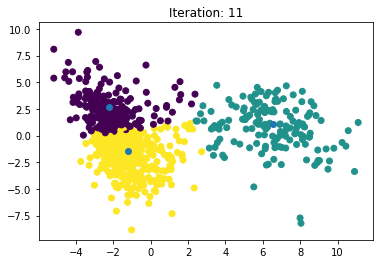

In [69]:
max_iteration = 100
k=3
old_centroids = pd.DataFrame()
centroids = init_cent(k, df1)
i=0
while i<max_iteration and not old_centroids.equals(centroids):
    old_centroids = centroids
    labels = get_labels(df1, centroids)
    centroids = new_cent(k,df1, labels)
    plot_cluster(df1, labels, centroids, i)
    i=i+1

In [70]:
centroids

,0,1,2
rounds_played,2.281130,2.707930,3.135959
damage_per_round,4.204021,5.039801,5.959581
kills_per_death,3.479575,5.808418,4.950689
kills_per_round,4.046148,6.141361,5.900822
assists_per_round,5.768676,3.238323,6.065991
deaths_per_round,7.007287,5.252948,6.660258
rating,4.019239,6.119703,5.644796
0_kill_ratio,6.648707,4.346870,4.805412
5_kill_ratio,2.832201,3.688895,3.771382
rifle_kills_ratio,6.736569,2.981595,7.717759


In [71]:
from sklearn.cluster import KMeans

In [72]:
kms = KMeans(3)
kms.fit(df1)
centroids2 = kms.cluster_centers_
centroids2

array([[3.19830475, 5.12980469, 5.88028169, 6.20974265, 3.458125  ,
        5.42585227, 6.17806818, 4.48328185, 3.808014  , 3.16115899,
        7.14303899, 2.52364799, 5.69311273],
       [3.91776788, 6.20851064, 5.17038401, 6.12837475, 6.2331307 ,
        6.67007461, 5.89615916, 4.68705775, 4.0014063 , 7.88962382,
        1.57752305, 3.30360731, 5.4027893 ],
       [2.70805139, 4.54261452, 3.74779109, 4.39760687, 5.91925466,
        7.08300395, 4.32507058, 6.42744917, 3.04366405, 6.91473892,
        1.59498768, 3.70580333, 4.74015907]])

In [73]:
centroids2_df = pd.DataFrame(centroids2, columns=centroids.index).T
centroids2_df

,0,1,2
rounds_played,3.198305,3.917768,2.708051
damage_per_round,5.129805,6.208511,4.542615
kills_per_death,5.880282,5.170384,3.747791
kills_per_round,6.209743,6.128375,4.397607
assists_per_round,3.458125,6.233131,5.919255
deaths_per_round,5.425852,6.670075,7.083004
rating,6.178068,5.896159,4.325071
0_kill_ratio,4.483282,4.687058,6.427449
5_kill_ratio,3.808014,4.001406,3.043664
rifle_kills_ratio,3.161159,7.889624,6.914739


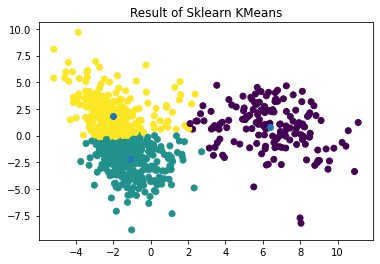

In [74]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(df1)
centroids_2d = pca.transform(centroids2_df.T)
labels = get_labels(df1, centroids2_df)
plt.title('Result of Sklearn KMeans')
plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
plt.show()